In [1]:
#Importamos las librerias correspondientes.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import funpymodeling as fp
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score, precision_score

## Desafío IV.
* Proyecto Integrador

Para la cuarta y última entrega que tenemos que realizar en este curso, la idea es adoptar el rol de data scientists dentro de una firma. Con la intención de consolidar nuestra posición como analistas en la compañía, buscaremos presentar un tópico innovador al directorio. 
Tema de investigación
En esta ocasión hemos elegido un dataset que estudia los diversos motivos que hacen que un empleado decida abandonar una empresa. La clave del éxito en cualquier organización es no sólo atraer sino fundamentalmente retener a los mejores talentos. 
Como analista de recursos humanos, una de las tareas clave es determinar qué factores mantienen a los empleados en la empresa y cuáles impulsan a otros a irse. En los datos se incluye un conjunto de datos sobre los empleados que trabajan actualmente en la empresa o que han dimitido. El objetivo es identificar y mejorar estos factores para evitar la pérdida de buenas personas.

* Antecedentes sobre el tema

El área de recursos humanos, al igual que muchas otras, es uno de los ámbitos más afectados por la disrupción tecnológica y la adopción de nuevas tecnologías. Las decisiones data-driven en lo que respecta a elección de personal y de beneficios corporativos tienen un alto potencial y son cada vez más demandadas. El estado del arte en este tema si bien es relativamente nuevo, cada vez cobra mayor importancia.

* Aporte esperado

Luego del análisis exploratorio y del estudio de las relaciones entre variables, intentaremos determinar qué factores son aquellos que se tornan más relevantes en estos tiempos para la toma de decisiones de los empleados en términos de abandonar o no la empresa. En base a las conclusiones que podamos obtener, dar una serie de recomendaciones acerca de qué puntos debe atacar la empresa en pos del objetivo de mantener a su personal. 
Disponibilidad de datos e infraestructura
Observaciones: PONER CANTIDAD DE OBSERVACIONES
Variable objetivo: decisión de continuidad o abandono de la empresa.
Variables explicativas: 
1.	AGE Numerical Value
2.	ATTRITION Employee leaving the company (0=no, 1=yes)
3.	BUSINESS TRAVEL (1=No Travel, 2=Travel Frequently, 3=Travel Rarely)
4.	DAILY RATE Numerical Value - Salary Level
5.	DEPARTMENT (1=HR, 2=R&D, 3=Sales)
6.	DISTANCE FROM HOME Numerical Value - THE DISTANCE FROM WORK TO HOME
7.	EDUCATION Numerical Value. (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')
8.	EDUCATION FIELD (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)
9.	EMPLOYEE COUNT Numerical Value
10.	EMPLOYEE NUMBER Numerical Value - EMPLOYEE ID
11.	ENVIRONMENT SATISFACTION Numerical Value - SATISFACTION WITH THE ENVIRONMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
12.	GENDER (1=FEMALE, 2=MALE)
13.	HOURLY RATE Numerical Value - HOURLY SALARY
14.	JOB INVOLVEMENT Numerical Value - JOB INVOLVEMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
15.	JOB LEVEL Numerical Value - LEVEL OF JOB
16.	JOB ROLE (1=HR REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= RESEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIVE, 9= SALES REPRESENTATIVE)
17.	JOB SATISFACTION Numerical Value - SATISFACTION WITH THE JOB (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
18.	MARITAL STATUS (1=DIVORCED, 2=MARRIED, 3=SINGLE)
19.	MONTHLY INCOME Numerical Value - MONTHLY SALARY
20.	MONTHLY RATE Numerical Value - MONTHLY RATE
21.	NUMCOMPANIES WORKED Numerical Value - NO. OF COMPANIES WORKED AT
22.	OVER 18 (1=YES, 2=NO)
23.	OVERTIME (1=NO, 2=YES)
24.	PERCENT SALARY HIKE Numerical Value - PERCENTAGE INCREASE IN SALARY
25.	PERFORMANCE RATING Numerical Value - PERFORMANCE RATING
26.	RELATIONS SATISFACTION Numerical Value - RELATIONS SATISFACTION
27.	STANDARD HOURS Numerical Value - STANDARD HOURS
28.	STOCK OPTIONS LEVEL Numerical Value - STOCK OPTIONS (Higher the number, the more stock option an employee has)
29.	TOTAL WORKING YEARS Numerical Value - TOTAL YEARS WORKED
30.	TRAINING TIMES LAST YEAR Numerical Value - HOURS SPENT TRAINING
31.	WORK LIFE BALANCE Numerical Value - TIME SPENT BETWEEN WORK AND OUTSIDE
32.	YEARS AT COMPANY Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPANY
33.	YEARS IN CURRENT ROLE Numerical Value -YEARS IN CURRENT ROLE
34.	YEARS SINCE LAST PROMOTION Numerical Value - LAST PROMOTION
35.	YEARS WITH CURRENT MANAGER Numerical Value - YEARS SPENT WITH CURRENT MANAGER

Plan de trabajo y Cronograma tentativo
-	Hasta el 25/11: análisis exploratorio y estudio de relaciones entre variables.
-	Hasta el 30/11: armado de modelos de clasificación iniciales.
-	Hasta el 9/12: Tuneo de hiperparámetros con los conceptos vistos y aplicación de modelos de la unidad 6 (modelos de ensamble).
-	Hasta el 12/12: investigar librería pickle y generación de un pipeline.
-	Hasta el 16/12: ajustes finales y armado de PPT.
 




In [2]:
# Levantamos el df.
df = pd.read_excel("./Data/employee_attrition.xlsx")

In [3]:
len(df)

1030

In [4]:
df.head(3)

,Age,Attrition,TotalWorkingYears,BusinessTravel,Department,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50,No,32,Travel_Rarely,Research & Development,2,Medical,1,997,4,...,4,3,80,1,1,2,5,4,1,3
1,36,No,7,Travel_Rarely,Research & Development,2,Medical,1,178,2,...,4,4,80,2,0,3,3,2,0,1
2,21,Yes,1,Travel_Rarely,Sales,1,Marketing,1,1780,2,...,3,2,80,0,3,3,1,0,1,0


## Análisis Exploratorio.
El objetivo es identificar y mejorar aquellos factores que pueden evitar la potencial pérdida del personal valioso de la empresa.


#### Comenzamos analizando el status de nuestro dataset.

In [5]:
fp.status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,1,0.000971,44,int64
1,Attrition,0,0.0,1,0.000971,3,object
2,TotalWorkingYears,0,0.0,7,0.006796,40,int64
3,BusinessTravel,0,0.0,1,0.000971,4,object
4,Department,0,0.0,1,0.000971,4,object
5,Education,0,0.0,1,0.000971,6,int64
6,EducationField,0,0.0,1,0.000971,7,object
7,EmployeeCount,0,0.0,1,0.000971,2,int64
8,EmployeeNumber,0,0.0,1,0.000971,1030,int64
9,EnvironmentSatisfaction,0,0.0,1,0.000971,5,int64


In [6]:
df.duplicated().any()

False

### Primeras observaciones:
- No existen campos con nulos.
- Ninguna observacion es por completo igual a otra (no hay registros duplicados)

Por tanto, nuestro dataset final (antes de dividirlo en conjuntos de entrenamiento y testeo) cuenta con 1.029 observaciones limpias.


### Formatos y análisis de la existencia de variables que no aporten valor

Para ver qué cantidad de valores toma cada campo, podemos usar un .nunique().

Tomar siempre el mismo valor no aporta nada.

Pero no podemos quedarnos únicamente con este análisis sino que tenemos que además ver si dentro de los valores que puede adoptar cada variable, existe una respuesta que sea predominante y esté en casi todas las observaciones.

Para esto podemos separar a las variables categóricas de las numéricas, y evaluar para las primeras la frecuencia y para las segundas la varianza.

De esta forma estudiaríamos la variabilidad y la predominancia de los valores de cada campo.


In [7]:
df.nunique()

Age                           44
Attrition                      3
TotalWorkingYears             40
BusinessTravel                 4
Department                     4
Education                      6
EducationField                 7
EmployeeCount                  2
EmployeeNumber              1030
EnvironmentSatisfaction        5
Gender                         3
HourlyRate                    72
JobInvolvement                 5
JobLevel                       6
JobRole                       10
JobSatisfaction                5
MaritalStatus                  4
MonthlyIncome                964
MonthlyRate                 1011
NumCompaniesWorked            10
Over18                         2
OverTime                       3
PercentSalaryHike             16
PerformanceRating              3
RelationshipSatisfaction       5
StandardHours                  2
StockOptionLevel               4
TrainingTimesLastYear          7
WorkLifeBalance                5
YearsAtCompany                32
YearsInCur

A priori vemos que tanto EMPLOYEECOUNT como STANDARDHOURS no aportan nada, por lo que las dejaremos de lado.

In [8]:
primerdrop = ['EmployeeCount', 'StandardHours']

In [9]:
df = df.drop(columns=primerdrop, axis=1)
df.shape

(1030, 31)

##### Separamos las variables cualitativas de las cuantitativas para optimizar el análisis. 

In [10]:
numericas = [col for col in df.columns if df[col].dtype != "object"]
categoricas = [col for col in df.columns if df[col].dtype == "object"]

porce_var_cat = len(categoricas) / (len(numericas) + len(categoricas)) * 100
redondeado_cat = round(porce_var_cat , 2)

porce_var_num = len(numericas) / (len(numericas) + len(categoricas)) * 100
redondeado_num = round(porce_var_num , 2)

print(f"El {redondeado_num} % de nuestro dataset esta conformado por variables cuantitativas, estas son:\n\n {numericas}")
print("")
print("")
print(f"El {redondeado_cat} % de nuestro dataset esta conformado por variables cualitativas, estas son:\n\n {categoricas}")

El 70.97 % de nuestro dataset esta conformado por variables cuantitativas, estas son:

 ['Age', 'TotalWorkingYears', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


El 29.03 % de nuestro dataset esta conformado por variables cualitativas, estas son:

 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


## Análisis de Variables Numéricas.

In [11]:
fp.profiling_num(df[numericas])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Age,37.247573,9.508621,0.255282,19.00,23.00,30.00,36.0,43.00,55.00,58.00
1,TotalWorkingYears,11.185437,7.861507,0.702834,1.00,1.00,6.00,10.0,15.00,28.00,34.71
2,Education,2.889320,1.056877,0.365788,1.00,1.00,2.00,3.0,4.00,4.00,5.00
3,EmployeeNumber,1023.372816,606.846930,0.592987,13.58,91.80,493.75,1018.0,1552.75,1971.55,2047.13
4,EnvironmentSatisfaction,2.680583,1.099479,0.410164,1.00,1.00,2.00,3.0,4.00,4.00,4.00
5,HourlyRate,66.615534,20.569344,0.308777,30.00,34.00,48.00,67.0,84.00,97.55,100.00
6,JobInvolvement,2.710680,0.714818,0.263704,1.00,1.00,2.00,3.0,3.00,4.00,4.00
7,JobLevel,2.041748,1.120185,0.548640,1.00,1.00,1.00,2.0,3.00,4.00,5.00
8,JobSatisfaction,2.709709,1.099608,0.405803,1.00,1.00,2.00,3.0,4.00,4.00,4.00
9,MonthlyIncome,6443.534951,4796.407207,0.744375,1266.80,2086.90,2811.75,4731.5,8433.50,17620.30,19662.97


La única variable que tiene una varianza relativamente cercana a 1 es STOCKOPTIONLEVEL. 

Por lo pronto si bien sabemos que no aportará demasiado, optamos por no dropearla.

#### Ploteamos las distribuciones de nuestras variables númericas para visualizar su distribución. 

No haremos demasiado hincapié en esta parte porque más adelante haremos esto mismo pero combinado con la target:

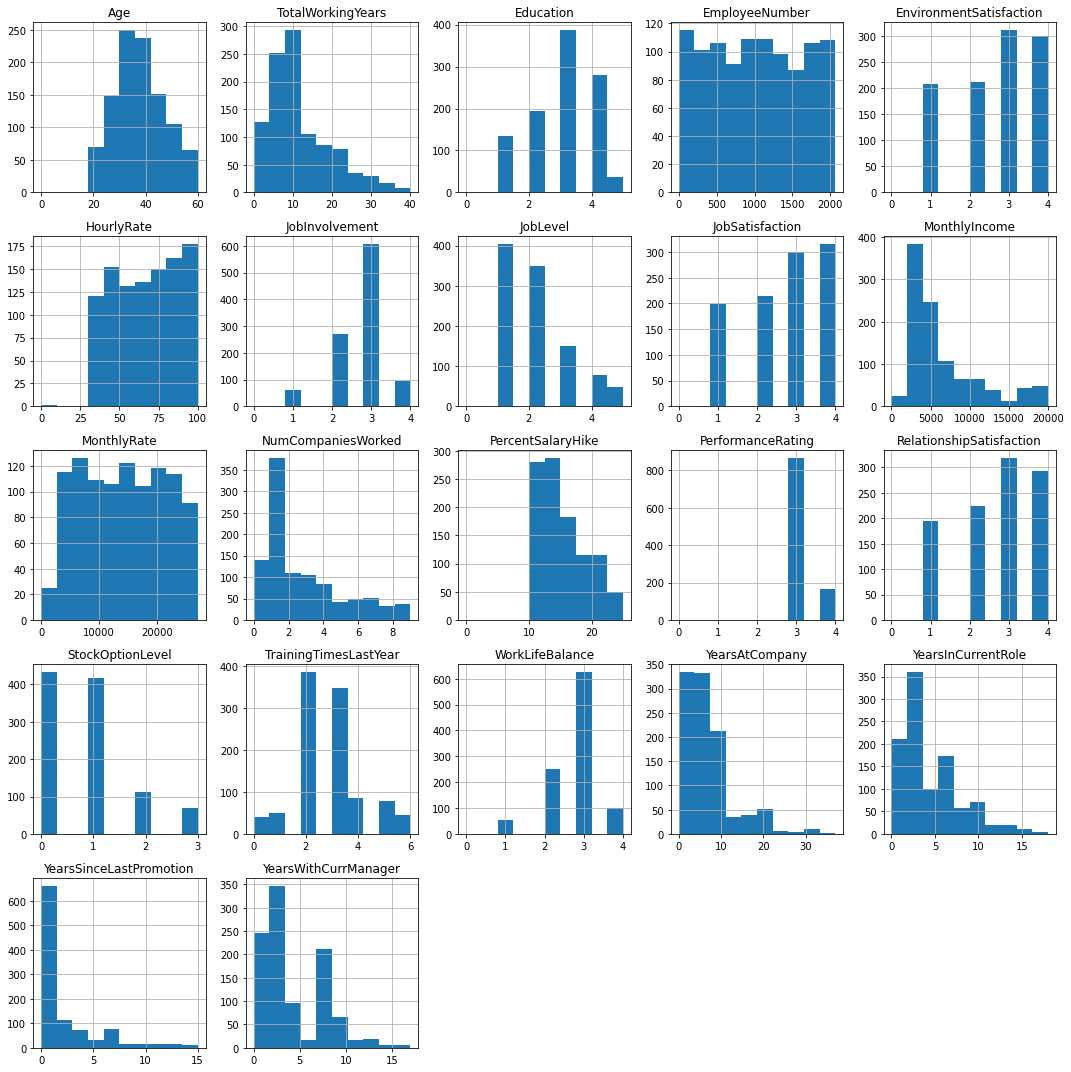

In [12]:
df.hist(figsize=(15,15)) 
plt.tight_layout()
plt.show()

####  Análisis univariado de ciertas variables continuas que consideramos relevantes a priori.

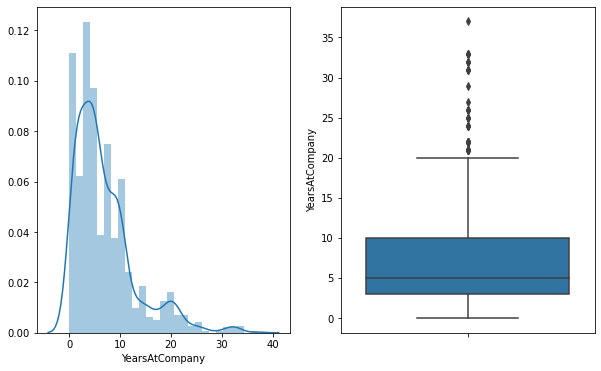

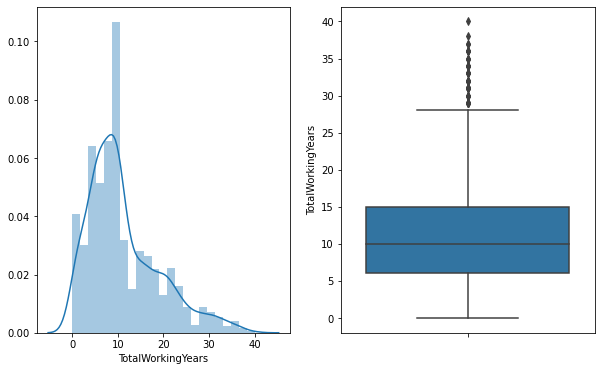

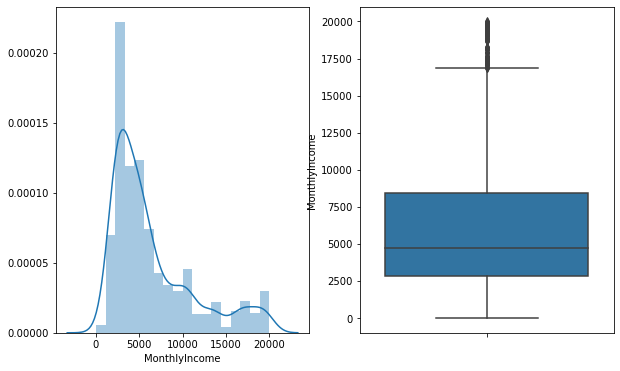

In [13]:
col_list = ['YearsAtCompany', 'TotalWorkingYears', 'MonthlyIncome']
for col in col_list:
    fig, ax = plt.subplots(1,2, figsize = (10,6))
    df2=df[col_list].copy()
    sns.distplot(df[col].dropna(), ax = ax[0]);
    sns.boxplot(col, data = df[col_list], ax = ax[1], orient = 'v')

## Análisis de Variables Categóricas

In [14]:
#for i in categoricas:
#    total_vble = df[i].value_counts().sum()
#    porcentajes_vble = df[i].value_counts()/total_vble*100
#    print(i)
#    print(porcentajes_vble)
#    print(" ")

In [15]:
fp.freq_tbl(df)

  Attrition  frequency  percentage  cumulative_perc
0        No        853    0.828155         0.828155
1       Yes        176    0.170874         0.999029
2         0          1    0.000971         1.000000

----------------------------------------------------------------

      BusinessTravel  frequency  percentage  cumulative_perc
0      Travel_Rarely        728    0.706796         0.706796
1  Travel_Frequently        199    0.193204         0.900000
2         Non-Travel        102    0.099029         0.999029
3                  0          1    0.000971         1.000000

----------------------------------------------------------------

               Department  frequency  percentage  cumulative_perc
0  Research & Development        676    0.656311         0.656311
1                   Sales        311    0.301942         0.958252
2         Human Resources         42    0.040777         0.999029
3                       0          1    0.000971         1.000000

----------------------

Vemos que:
- Over18 no aporta valor, la dropearemos. El resto pueden llegar a decirnos algo.
- Haremos binarias las variables Attrition (target), Gender y Overtime.

In [16]:
segundo_drop = ['Over18']

In [17]:
df = df.drop(columns=segundo_drop, axis=1)
df.shape

(1030, 30)

In [18]:
print(df.Attrition.value_counts())
print(df.Gender.value_counts())
print(df.OverTime.value_counts())

No     853
Yes    176
0        1
Name: Attrition, dtype: int64
Male      617
Female    412
0           1
Name: Gender, dtype: int64
No     731
Yes    298
0        1
Name: OverTime, dtype: int64


In [19]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [20]:
df.head(3)

,Age,Attrition,TotalWorkingYears,BusinessTravel,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50,0,32,Travel_Rarely,Research & Development,2,Medical,997,4,0,...,22,4,3,1,1,2,5,4,1,3
1,36,0,7,Travel_Rarely,Research & Development,2,Medical,178,2,0,...,20,4,4,2,0,3,3,2,0,1
2,21,1,1,Travel_Rarely,Sales,1,Marketing,1780,2,0,...,13,3,2,0,3,3,1,0,1,0


#### Ploteamos las variables categóricas para analizar su distribución.

In [21]:
categoricas = [col for col in df.columns if df[col].dtype == "object"]
categoricas

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

Veamos ahora los formatos nuevamente...

In [22]:
#df['Attrition'] = df.Attrition.astype('bool')
#df['OverTime'] = df.OverTime.astype('bool')
#df['Gender'] = df.Gender.astype('bool')

In [23]:
df.dtypes

Age                          int64
Attrition                    int64
TotalWorkingYears            int64
BusinessTravel              object
Department                  object
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

Vemos que todas las variables tienen a priori el tipo de dato que uno presupone.

Ahora, redefinamos las categóricas ahora que hicimos booleanas las que correspondían...

In [24]:
categoricas = [col for col in df.columns if df[col].dtype == "object"]
categoricas

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [25]:
df_sin_dummies = df

Abramos estas variables con el método GetDummies de forma tal de poder incluirlas en el análisis...

In [26]:
df = pd.get_dummies(df, columns=['BusinessTravel'], drop_first=True, prefix="businesstravel")
df = pd.get_dummies(df, columns=['Department'], drop_first=True, prefix="department")
df = pd.get_dummies(df, columns=['EducationField'], drop_first=True, prefix="education")
df = pd.get_dummies(df, columns=['JobRole'], drop_first=True, prefix="job")
df = pd.get_dummies(df, columns=['MaritalStatus'], drop_first=True, prefix="status")

In [27]:
df.shape

(1030, 49)

In [28]:
print("Trabajaremos con un dataset final de " + str(df.shape[0]) + " observaciones y " + str(df.shape[1]) +" variables.")

Trabajaremos con un dataset final de 1030 observaciones y 49 variables.


## Análisis en escenario univariado de las variables contra la Target.

Sabemos que teniendo una variable binaria como lo es Attrition, no tiene tanto rigor a priori el estudio de las correlaciones crudas, sino que lo mejor sería estudiar la relación con algunos gráficos (histogramas en el caso de las cuantitativas, gráficos de barras para las categóricas).

Para esto, separamos el análisis en 2 partes:
- Parte I: Análisis de correlaciones
- Parte II: Estudio de gráficos

### Parte I - Correlaciones

##### Realizamos una matriz de correlación para poder identificar aquellas variables que contribuyen más a la hora de explicar nuestra variable objetivo. 

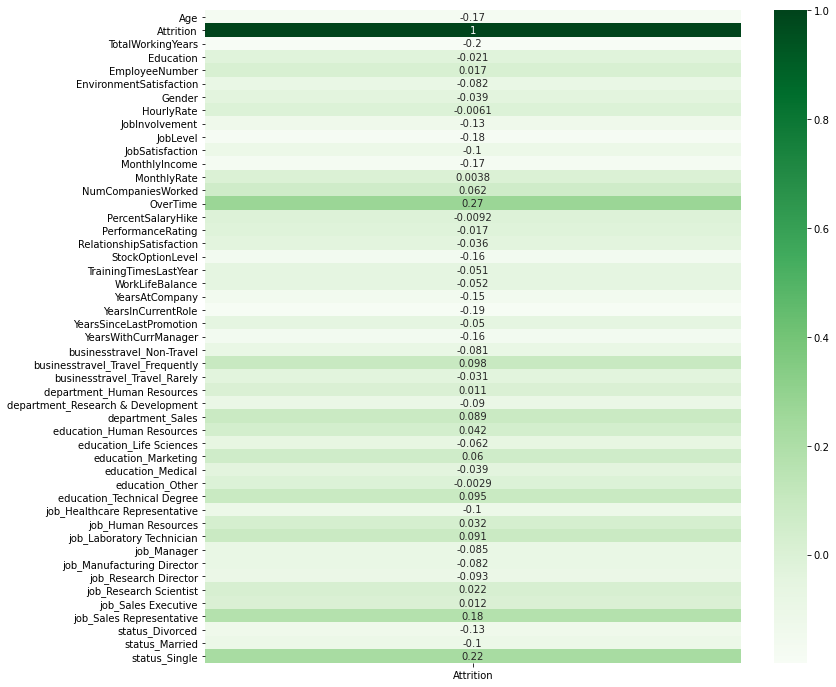

In [29]:
plt.figure(figsize=(12,12))
matriz_corr = sns.heatmap(df.corr()[['Attrition']], annot=True, cmap="Greens")

In [30]:
matriz = df.corr()
matriz

,Age,Attrition,TotalWorkingYears,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,job_Laboratory Technician,job_Manager,job_Manufacturing Director,job_Research Director,job_Research Scientist,job_Sales Executive,job_Sales Representative,status_Divorced,status_Married,status_Single
Age,1.000000,-0.174394,0.694797,0.234915,-0.007146,0.005712,0.004587,0.036173,0.053442,0.526021,...,-0.152403,0.278233,0.071837,0.190117,-0.153336,0.030882,-0.212049,0.008600,0.091545,-0.097699
Attrition,-0.174394,1.000000,-0.198479,-0.020805,0.017169,-0.081639,-0.038962,-0.006064,-0.126644,-0.180493,...,0.091307,-0.085175,-0.082305,-0.093201,0.021826,0.012147,0.176132,-0.125736,-0.103473,0.224598
TotalWorkingYears,0.694797,-0.198479,1.000000,0.162597,-0.016226,0.001013,0.067744,-0.010815,0.013707,0.786608,...,-0.224401,0.465343,0.086847,0.330653,-0.226181,-0.011889,-0.218081,0.026509,0.052581,-0.077173
Education,0.234915,-0.020805,0.162597,1.000000,0.062823,-0.025436,0.012382,0.021286,0.059195,0.098306,...,-0.053817,0.011030,-0.030128,0.072886,-0.002978,0.069907,-0.085174,-0.003407,0.015604,-0.007968
EmployeeNumber,-0.007146,0.017169,-0.016226,0.062823,1.000000,0.021338,-0.029333,0.037428,0.010660,-0.033052,...,0.000770,-0.029037,-0.018229,-0.016791,-0.018795,0.011509,0.015166,-0.033583,0.047261,-0.017067
EnvironmentSatisfaction,0.005712,-0.081639,0.001013,-0.025436,0.021338,1.000000,0.037149,-0.030230,-0.006413,-0.000998,...,0.023725,0.021750,0.065170,-0.049016,0.011662,-0.046983,-0.006921,0.015838,-0.022327,0.014848
Gender,0.004587,-0.038962,0.067744,0.012382,-0.029333,0.037149,1.000000,-0.009119,-0.035504,0.081067,...,-0.081588,0.075684,0.047943,0.051660,-0.017585,0.020411,0.004856,-0.061863,0.025448,0.029851
HourlyRate,0.036173,-0.006064,-0.010815,0.021286,0.037428,-0.030230,-0.009119,1.000000,0.055019,-0.041227,...,0.024653,-0.001460,-0.021131,-0.018100,0.033554,-0.009793,-0.038301,-0.003240,0.027783,-0.020125
JobInvolvement,0.053442,-0.126644,0.013707,0.059195,0.010660,-0.006413,-0.035504,0.055019,1.000000,0.004176,...,-0.029448,0.016524,-0.039986,0.028211,0.046605,0.005940,-0.043863,0.021352,0.046725,-0.061319
JobLevel,0.526021,-0.180493,0.786608,0.098306,-0.033052,-0.000998,0.081067,-0.041227,0.004176,1.000000,...,-0.335187,0.540498,0.122969,0.438991,-0.399537,0.131711,-0.218668,0.011240,0.052562,-0.062634


In [31]:
renuncia_corr = matriz.iloc[:,1:2]
renuncia_corr

,Attrition
Age,-0.174394
Attrition,1.000000
TotalWorkingYears,-0.198479
Education,-0.020805
EmployeeNumber,0.017169
EnvironmentSatisfaction,-0.081639
Gender,-0.038962
HourlyRate,-0.006064
JobInvolvement,-0.126644
JobLevel,-0.180493


Principales variables correlacionadas con la target (aunque como vemos... la correlación para la gran mayoría parece ser MUY pobre...)

In [32]:
renuncia_corr.loc[renuncia_corr.Attrition > 0.05 , :]

,Attrition
Attrition,1.000000
NumCompaniesWorked,0.062259
OverTime,0.273495
businesstravel_Travel_Frequently,0.097972
department_Sales,0.089097
education_Marketing,0.060163
education_Technical Degree,0.095178
job_Laboratory Technician,0.091307
job_Sales Representative,0.176132
status_Single,0.224598


Correlaciones a nivel general (no sólo con la target sino todas entre sí, con un umbral de 0.7):

In [33]:
num_variables = len(matriz)
umbral = 0.7
vbles_correlacionadas = []

for row in range(1,num_variables):
    for col in range(0,row):
        if abs(matriz.iloc[row,col]) >= umbral:
            print('La variable {0} está correlacionada {1} con un factor de {2}.'.format(list(matriz)[row], list(matriz)[col], matriz.iloc[row,col]))
            vbles_correlacionadas.append([list(matriz)[row], list(matriz)[col], matriz.iloc[row,col]])

La variable JobLevel está correlacionada TotalWorkingYears con un factor de 0.7866077872955588.
La variable MonthlyIncome está correlacionada TotalWorkingYears con un factor de 0.7739181934529167.
La variable MonthlyIncome está correlacionada JobLevel con un factor de 0.9527619156444025.
La variable PerformanceRating está correlacionada PercentSalaryHike con un factor de 0.7747541468742223.
La variable YearsInCurrentRole está correlacionada YearsAtCompany con un factor de 0.7782096200455053.
La variable YearsWithCurrManager está correlacionada YearsAtCompany con un factor de 0.7600583245238597.
La variable YearsWithCurrManager está correlacionada YearsInCurrentRole con un factor de 0.706090905887176.
La variable businesstravel_Travel_Rarely está correlacionada businesstravel_Travel_Frequently con un factor de -0.7597806774482545.
La variable department_Sales está correlacionada department_Research & Development con un factor de -0.9088400696017062.
La variable job_Human Resources está 

### Parte II - Estudio de gráficos

In [34]:
df_sin_dummies.head()

,Age,Attrition,TotalWorkingYears,BusinessTravel,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50,0,32,Travel_Rarely,Research & Development,2,Medical,997,4,0,...,22,4,3,1,1,2,5,4,1,3
1,36,0,7,Travel_Rarely,Research & Development,2,Medical,178,2,0,...,20,4,4,2,0,3,3,2,0,1
2,21,1,1,Travel_Rarely,Sales,1,Marketing,1780,2,0,...,13,3,2,0,3,3,1,0,1,0
3,50,0,32,Travel_Frequently,Human Resources,3,Medical,644,1,0,...,11,3,3,1,2,3,32,5,10,7
4,52,0,18,Travel_Rarely,Research & Development,4,Life Sciences,1118,2,0,...,19,3,4,0,4,3,8,6,4,0


Tomando el dataframe antes de abrir las dummies, lo separamos en 2 para estudiarlo a fondo y ver las diferencias para los que abandonan o no la empresa.

In [35]:
df_sin_dummies_yes = df_sin_dummies.loc[df_sin_dummies.Attrition==1,:]
df_sin_dummies_no = df_sin_dummies.loc[df_sin_dummies.Attrition==0,:]

Analicemos primeros las variables cuantitativas y su relación con la target:

(array([75., 35., 22.,  3.,  1., 32.,  5.,  2.,  0.,  1.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

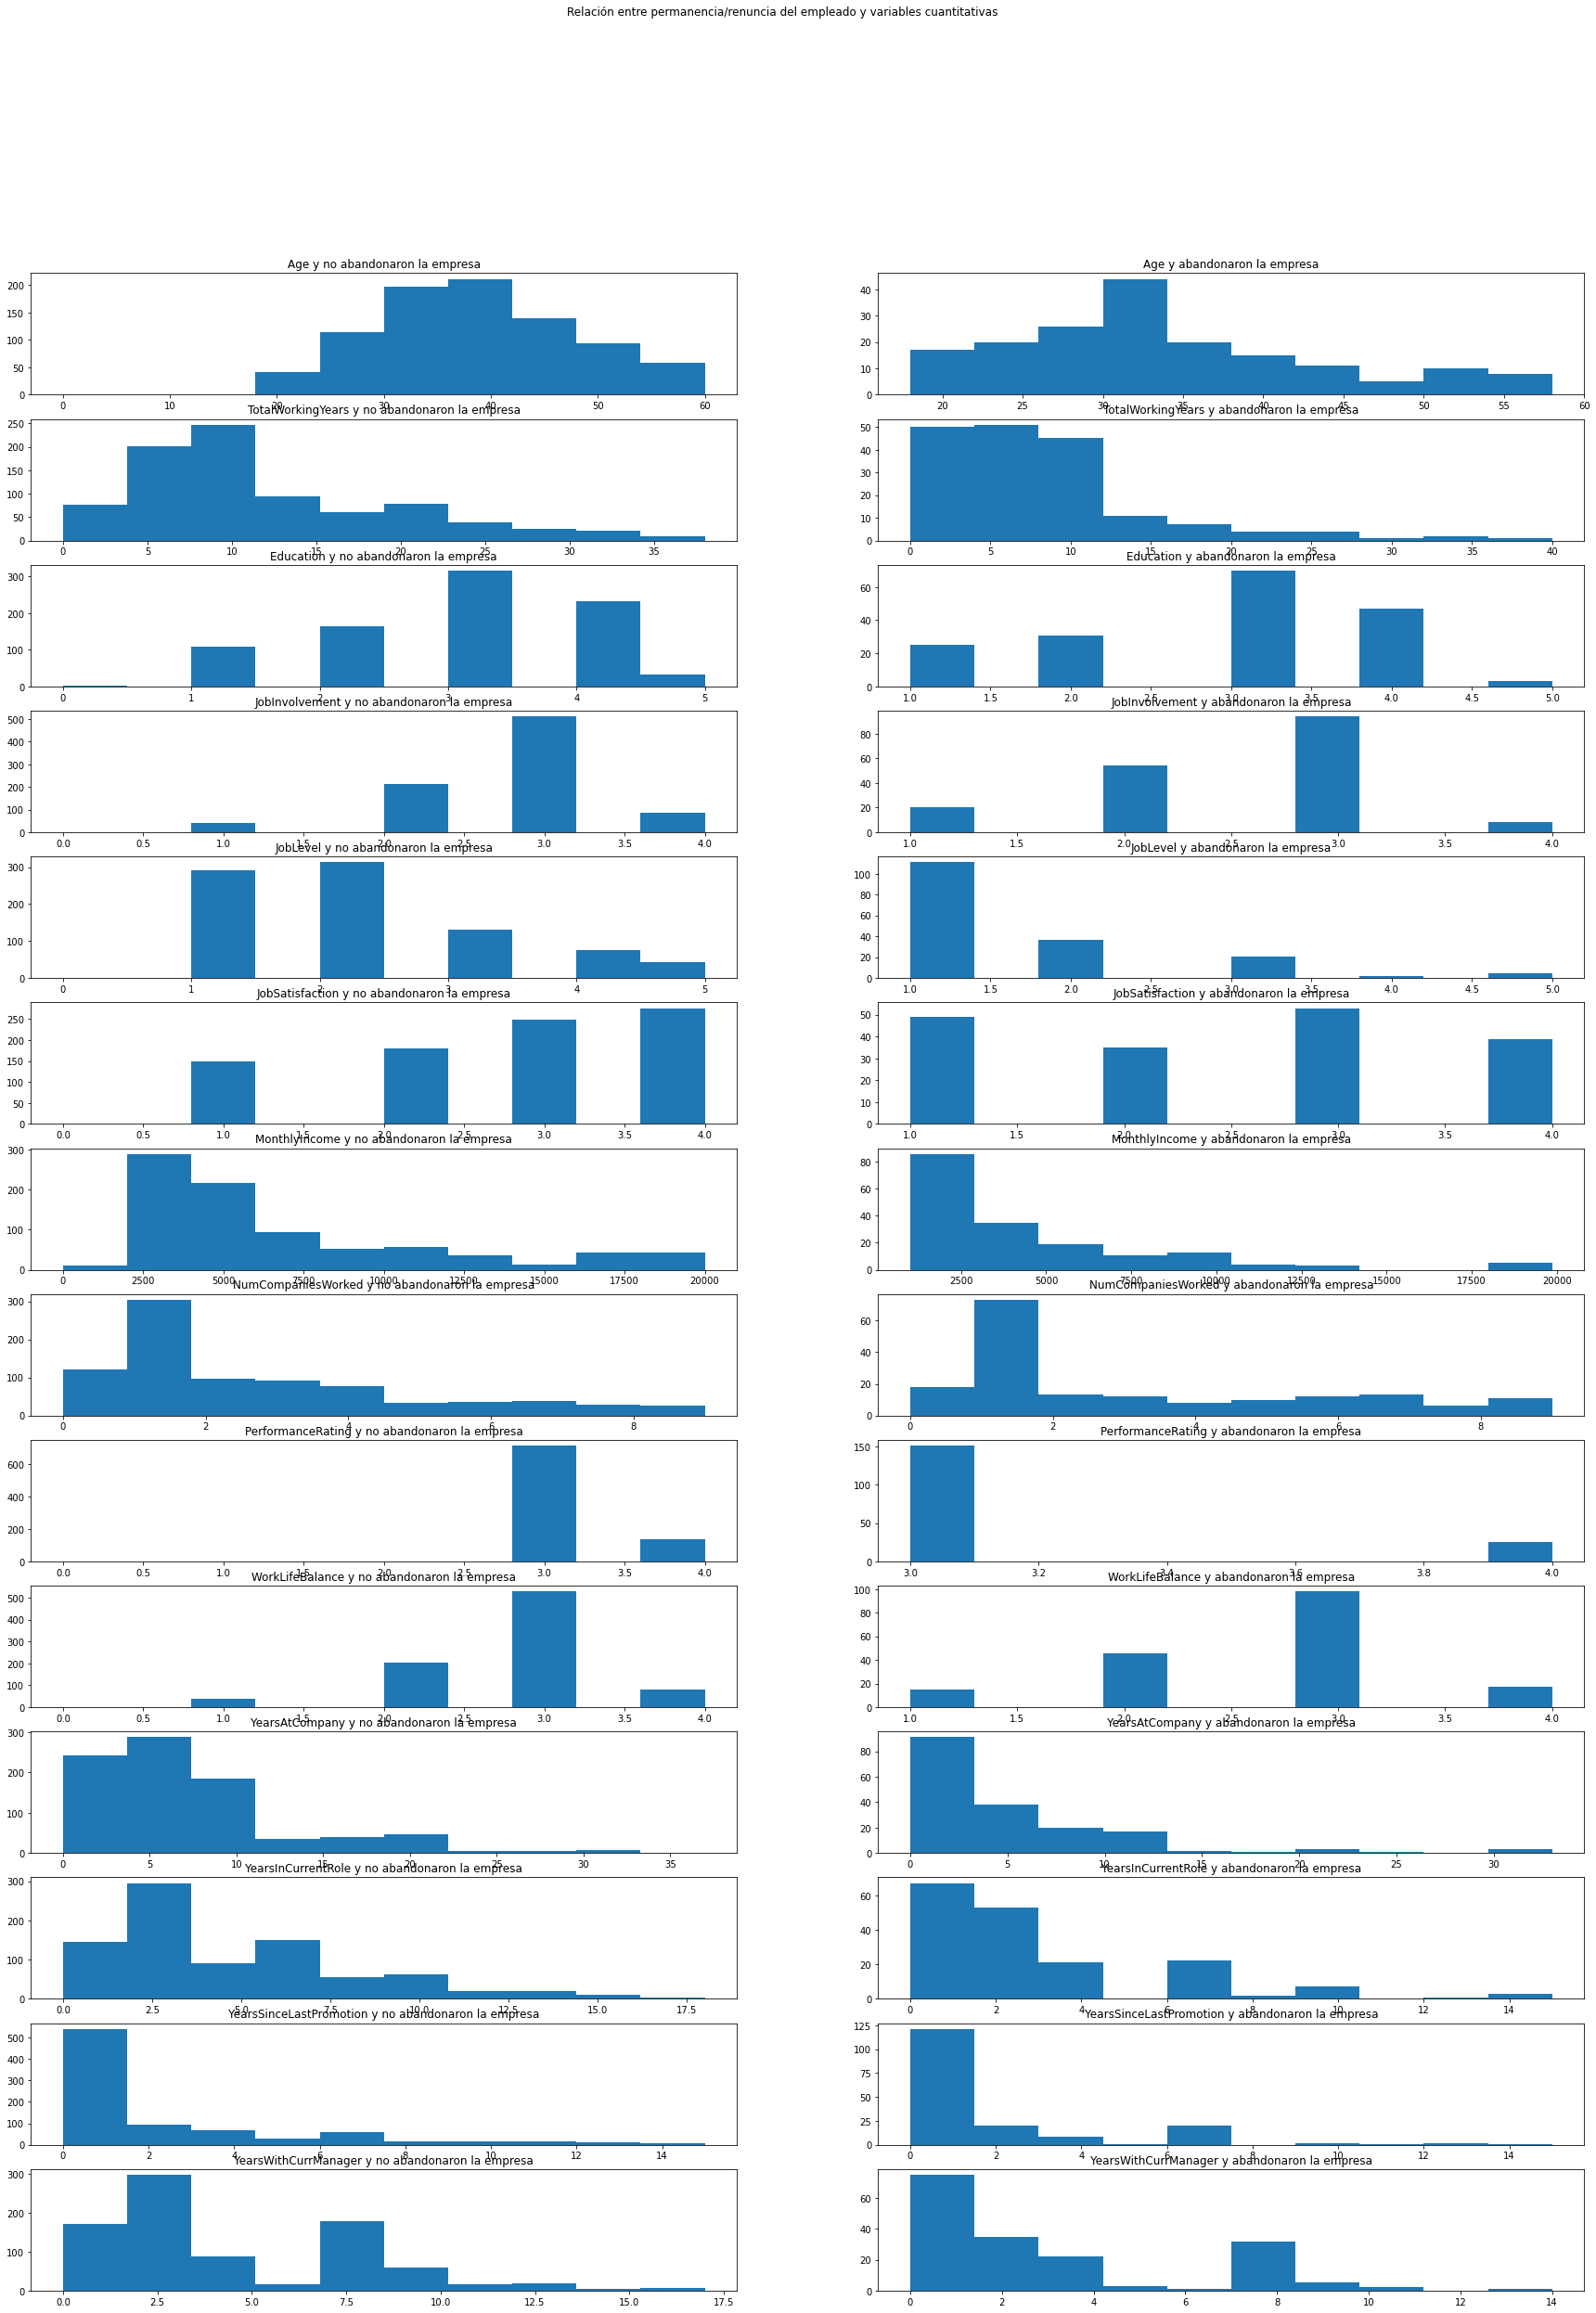

In [36]:
plt.figure(figsize=(30, 40))
plt.suptitle("Relación entre permanencia/renuncia del empleado y variables cuantitativas")

plt.subplot(14,2,1)
plt.title("Age y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='Age')

plt.subplot(14,2,2)
plt.title("Age y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='Age')

plt.subplot(14,2,3)
plt.title("TotalWorkingYears y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='TotalWorkingYears')

plt.subplot(14,2,4)
plt.title("TotalWorkingYears y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='TotalWorkingYears')

plt.subplot(14,2,5)
plt.title("Education y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='Education')

plt.subplot(14,2,6)
plt.title("Education y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='Education')

plt.subplot(14,2,7)
plt.title("JobInvolvement y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='JobInvolvement')

plt.subplot(14,2,8)
plt.title("JobInvolvement y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='JobInvolvement')

plt.subplot(14,2,9)
plt.title("JobLevel y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='JobLevel')

plt.subplot(14,2,10)
plt.title("JobLevel y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='JobLevel')

plt.subplot(14,2,11)
plt.title("JobSatisfaction y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='JobSatisfaction')

plt.subplot(14,2,12)
plt.title("JobSatisfaction y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='JobSatisfaction')

plt.subplot(14,2,13)
plt.title("MonthlyIncome y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='MonthlyIncome')

plt.subplot(14,2,14)
plt.title("MonthlyIncome y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='MonthlyIncome')

plt.subplot(14,2,15)
plt.title("NumCompaniesWorked y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='NumCompaniesWorked')

plt.subplot(14,2,16)
plt.title("NumCompaniesWorked y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='NumCompaniesWorked')

plt.subplot(14,2,17)
plt.title("PerformanceRating y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='PerformanceRating')

plt.subplot(14,2,18)
plt.title("PerformanceRating y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='PerformanceRating')

plt.subplot(14,2,19)
plt.title("WorkLifeBalance y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='WorkLifeBalance')

plt.subplot(14,2,20)
plt.title("WorkLifeBalance y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='WorkLifeBalance')

plt.subplot(14,2,21)
plt.title("YearsAtCompany y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='YearsAtCompany')

plt.subplot(14,2,22)
plt.title("YearsAtCompany y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='YearsAtCompany')

plt.subplot(14,2,23)
plt.title("YearsInCurrentRole y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='YearsInCurrentRole')

plt.subplot(14,2,24)
plt.title("YearsInCurrentRole y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='YearsInCurrentRole')

plt.subplot(14,2,25)
plt.title("YearsSinceLastPromotion y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='YearsSinceLastPromotion')

plt.subplot(14,2,26)
plt.title("YearsSinceLastPromotion y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='YearsSinceLastPromotion')

plt.subplot(14,2,27)
plt.title("YearsWithCurrManager y no abandonaron la empresa")
plt.hist(data=df_sin_dummies_no, x='YearsWithCurrManager')

plt.subplot(14,2,28)
plt.title("YearsWithCurrManager y abandonaron la empresa")
plt.hist(data=df_sin_dummies_yes, x='YearsWithCurrManager')

- En AGE, vemos que la moda de aquellos que se van de la empresa se ve mucho más concentrada en jóvenes, siendo pocos los mayores a 30 que se van.
- En TotalWorkingYears se ve algo similar: aquellas personas con muchos años en la empresa no suelen irse, quizás por las dificultades que presenta el mercado laboral a la hoa de reinsertarse.
- Respecto del nivel educativo no se observan diferencias sustanciales en el comportamiento de los individuos respecto del abandono o no de la empresa.
- Lo mismo ocurre en JobInvolvement.
- En JobSatisfaction, vemos que aquellos que se autodefinen como insatisfechos (puntaje = 1) son más propensos a abandonar el trabajo.
- Respecto del salario mensual también se denota que quienes menos cobran mayor rotación tienen.
- No se observan diferencias significativas en el número de compañias en las que trabajó la persona y el nivel de deserción laboral.
- También se observa tendencia a que las personas que se van de la empresa son las que menos años transcurrieron en la compañía.
- Algo similar se observa respecto de los años en el mismo puesto y con el mismo jefe.

Observemos ahora qué ocurre con las variables categóricas...

<AxesSubplot:title={'center':'MaritalStatus y abandonaron la empresa'}, xlabel='MaritalStatus', ylabel='count'>

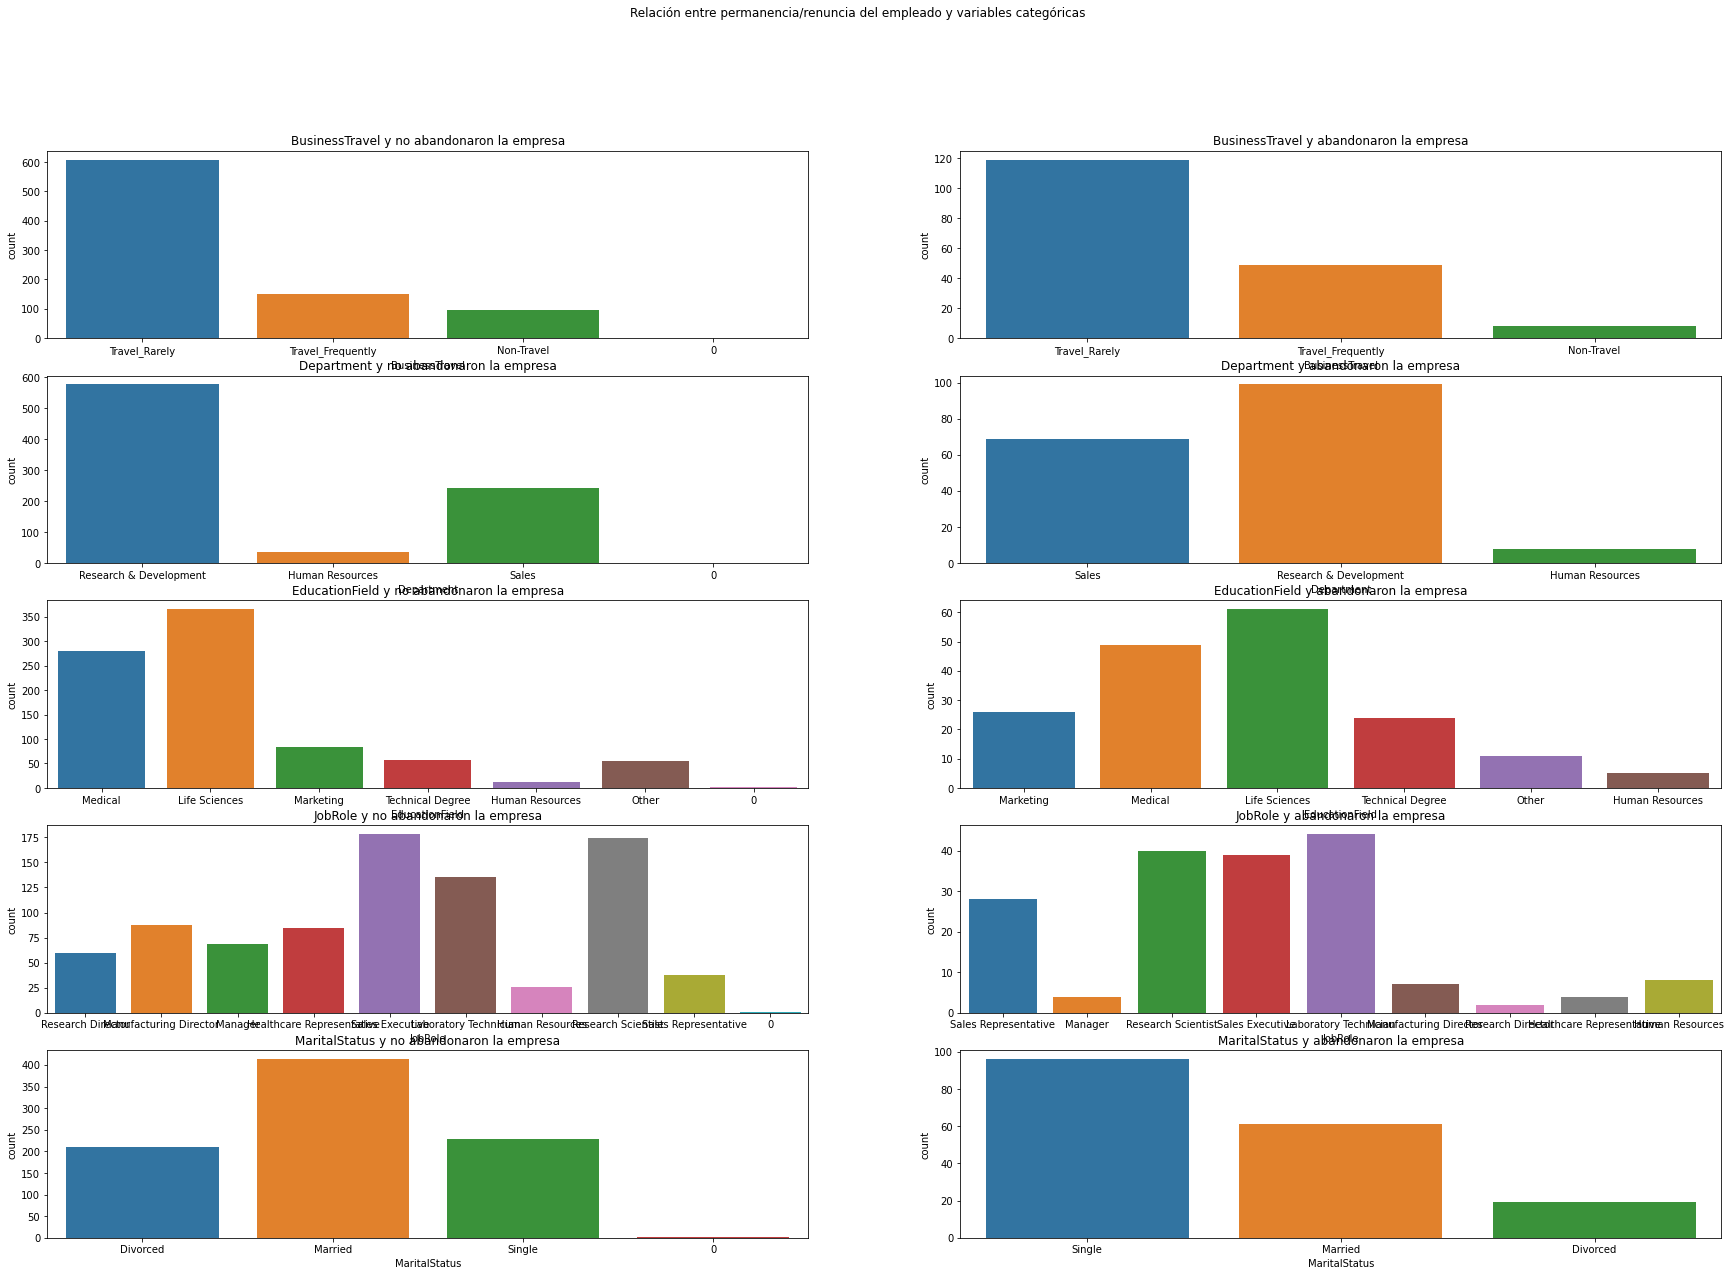

In [37]:
plt.figure(figsize=(30, 20))
plt.suptitle("Relación entre permanencia/renuncia del empleado y variables categóricas")

plt.subplot(5,2,1)
plt.title("BusinessTravel y no abandonaron la empresa")
sns.countplot(data=df_sin_dummies_no, x='BusinessTravel')

plt.subplot(5,2,2)
plt.title("BusinessTravel y abandonaron la empresa")
sns.countplot(data=df_sin_dummies_yes, x='BusinessTravel')

plt.subplot(5,2,3)
plt.title("Department y no abandonaron la empresa")
sns.countplot(data=df_sin_dummies_no, x='Department')

plt.subplot(5,2,4)
plt.title("Department y abandonaron la empresa")
sns.countplot(data=df_sin_dummies_yes, x='Department')

plt.subplot(5,2,5)
plt.title("EducationField y no abandonaron la empresa")
sns.countplot(data=df_sin_dummies_no, x='EducationField')

plt.subplot(5,2,6)
plt.title("EducationField y abandonaron la empresa")
sns.countplot(data=df_sin_dummies_yes, x='EducationField')

plt.subplot(5,2,7)
plt.title("JobRole y no abandonaron la empresa")
sns.countplot(data=df_sin_dummies_no, x='JobRole')

plt.subplot(5,2,8)
plt.title("JobRole y abandonaron la empresa")
sns.countplot(data=df_sin_dummies_yes, x='JobRole')

plt.subplot(5,2,9)
plt.title("MaritalStatus y no abandonaron la empresa")
sns.countplot(data=df_sin_dummies_no, x='MaritalStatus')

plt.subplot(5,2,10)
plt.title("MaritalStatus y abandonaron la empresa")
sns.countplot(data=df_sin_dummies_yes, x='MaritalStatus')

- No se observa una tendencia marcada respecto del nivel de deserción laboral y la presencia de viajes laborales.
- Sí se observa mayor rotación en el departamento de ventas, lo cual es lógico teniendo en cuenta que es per se un puesto más dinámico y demandado en el mercado laboral.
- De manera similar, se ve una leve inclinación de la tendencia respecto del área de estudios, siendo aquellos que estudiaron Marketing y tecnicaturas los más propensos a rotar y abandonar la empresa.
- En cuanto al puesto, acá también se pueden ver ciertas tendencias interesantes:
    - Aquellos en cargos jerárquicos (managers, directores de research, directores de manufactoring) no suelen irse de la empresa.
    - Se confirma una mayor rotación de aquellos que se dedican a la venta (sales representatives).
    - No se observan diferencias sustanciales para research scientists y sales executives.
    - Los técnicos de laboratorio tienen mayor tendencia a irse de la empresa, quizás tentados por la escasez de mano de obra vinculada a este sector en el mercado laboral.
- Vemos que hay una marcada concentración que quienes abandonan tienden a ser solteros (lógico).

### Por último, vemos el balanceo de clases de la variable target...

In [83]:
df['Attrition'].value_counts(normalize= True)

0    0.829126
1    0.170874
Name: Attrition, dtype: float64

<AxesSubplot:ylabel='Attrition'>

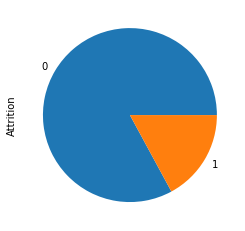

In [38]:
df['Attrition'].value_counts().plot(kind='pie')

## Preprocesamiento de variables para optimizar el EDA.
En esta sección vamos a preprocesar ciertas features para desarrollar un análisis más profundo de aquellas variables que mayor impacto y mayor grado de contribución tienen a la hora de analizar nuestra variable dependiente.

##### Creación de la variable "Generación" para clasificar las edades de los colaboradores.

In [39]:
df["Generaciones"]=df.Age.apply(lambda x: "Baby Boomers" if (x >= 56 and x <= 75) 
                   else ("Generación X" if(x <= 55 and x >= 39)
                   else ("Milennials" if (x <= 38 and x >= 26)
                   else "Generación Z")))

In [40]:
df["Generaciones"].value_counts()

Milennials      498
Generación X    397
Generación Z    102
Baby Boomers     33
Name: Generaciones, dtype: int64

##### Creación de la variable "Rendimiento" para clasificar el rendimiento de los colaboradores.

In [41]:
df["Rendimiento"] = df.JobLevel.apply(lambda x: "Bajo" if(x <= 2) 
                       else ("Medio" if(x <= 3.5)
                       else ("Alto")))

In [42]:
df["Rendimiento"].value_counts()

Bajo     754
Medio    151
Alto     125
Name: Rendimiento, dtype: int64

##### Creación de la variable "Nivel de Incremento" para clasificar el aumento de la masa salarial de los colaboradores.

In [43]:
df["Nivel de Incremento"] = df.PercentSalaryHike.apply(lambda x: "Bajo" if x <= 12 
                                 else ("Medio" if x <= 18
                                 else "Alto"))

##### Creación de la variable "Rango Salario" para clasificar en bandas salariales a los colaboradores.

In [44]:
df["Rango Salario"] = df.MonthlyIncome.apply(lambda x: "Bajo" if x <= 2814
                             else "Medio" if x <= 8446
                             else "Alto")

##### Creación de la variable "Compa Ratio" para analizar la competitividad de la compensación a cada colaborador.

In [45]:
# La utilidad de esta feature esta dada para analizar el grado de competitividad interna de la compensación en relación a cada colaborador.
df["Compa Ratio"] = df.MonthlyIncome / df.MonthlyIncome.median()

In [46]:
df[["Compa Ratio","Education","MonthlyIncome","YearsAtCompany",'JobLevel']]

,Compa Ratio,Education,MonthlyIncome,YearsAtCompany,JobLevel
0,3.677269,2,17399,5,4
1,1.044278,2,4941,3,2
2,0.566205,1,2679,1,1
3,3.846560,3,18200,32,5
4,2.207545,4,10445,8,3
...,...,...,...,...,...
1025,1.451971,3,6870,3,2
1026,0.602980,4,2853,0,1
1027,0.850682,2,4025,4,2
1028,4.085597,3,19331,1,5


##### Al analizar los datos de la tabla, podemos observar como existe una brecha salarial bastante amplia entre los colaboradores de la organización, lo cual puede llegar a generar insatisfacción, lo vamos a seguir analizando a continuación.

### Continuamos analizando las variables vinculadas a la remuneración para obtener algún insight en cuestión.

In [47]:
df[["Compa Ratio", "Education"]]

,Compa Ratio,Education
0,3.677269,2
1,1.044278,2
2,0.566205,1
3,3.846560,3
4,2.207545,4
...,...,...
1025,1.451971,3
1026,0.602980,4
1027,0.850682,2
1028,4.085597,3


<AxesSubplot:xlabel='Education', ylabel='Compa Ratio'>

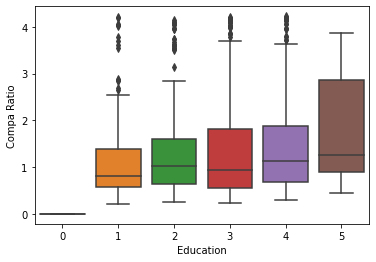

In [48]:
sns.boxplot(x = df["Education"], y = df["Compa Ratio"], data = df)

<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

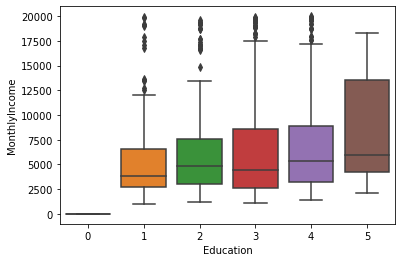

In [49]:
sns.boxplot(x = df["Education"], y = df.MonthlyIncome, data = df)

## Algunos comentarios respecto de este ratio "Compa Ratio":
Podemos ver como existe una gran cantidad de "outliers" en el grado uno y dos de educacion, lo cual significa que hay gente que no termino la universidad que cobra mas que gente que tiene un doctorado. Puede ser un factor clave en torno a la fuga de capital intelectual de la organización, se podria plantear una restructuracion de las politicas de compensación como mejora.

##### Para comprender y categorizar a las personas peor pagas dentro de la organizacion, generamos una mascara para poder filtrarlos y analizar las características de los mismos.

In [50]:
mask_compa_ratio_inferior= (df["Compa Ratio"] < 0.4)

In [51]:
fp.freq_tbl(df.loc[mask_compa_ratio_inferior])

   Generaciones  frequency  percentage  cumulative_perc
0  Generación Z         15    0.681818         0.681818
1    Milennials          7    0.318182         1.000000

----------------------------------------------------------------

  Rendimiento  frequency  percentage  cumulative_perc
0        Bajo         22         1.0              1.0

----------------------------------------------------------------

  Nivel de Incremento  frequency  percentage  cumulative_perc
0               Medio          8    0.363636         0.363636
1                Bajo          8    0.363636         0.727273
2                Alto          6    0.272727         1.000000

----------------------------------------------------------------

  Rango Salario  frequency  percentage  cumulative_perc
0          Bajo         22         1.0              1.0

----------------------------------------------------------------



##### Analizamos la feature "Compa Ratio" contra ciertas variables para ver si existe inequidad a la hora de remunerar a los colaboradores.

In [52]:
var_para_analizar_compa_ratio = ['Education', 'Gender',
                                 'JobInvolvement',
                                 'StockOptionLevel','YearsAtCompany'
                                ]

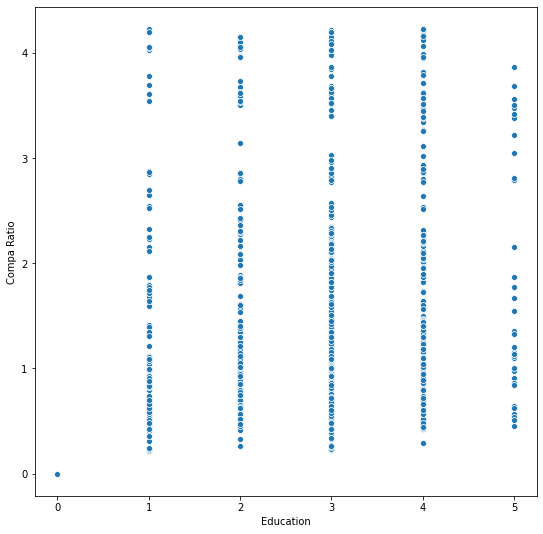

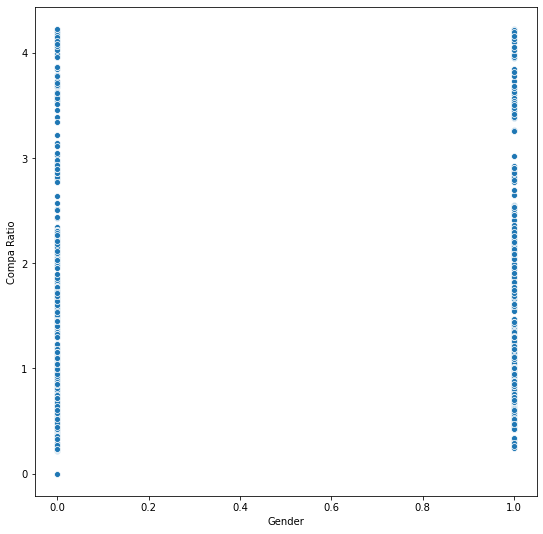

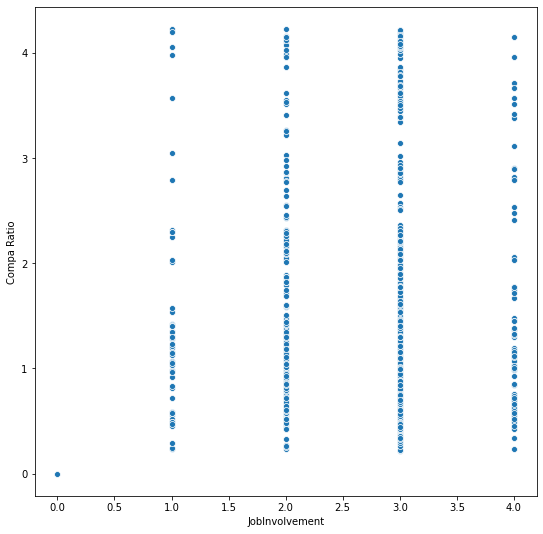

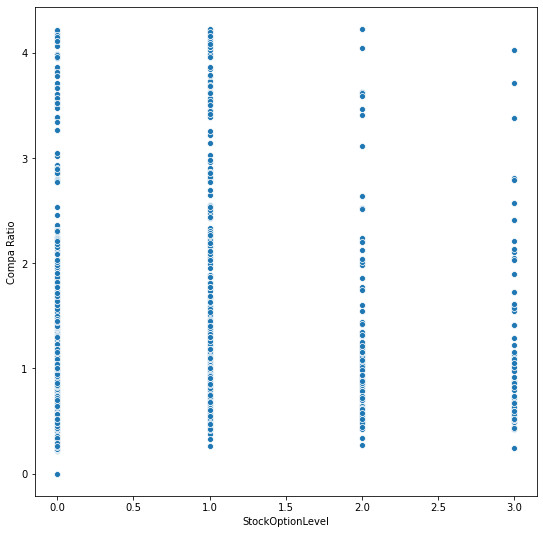

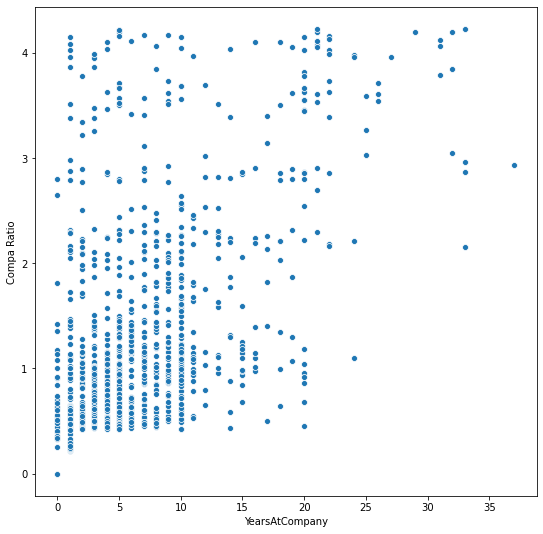

In [53]:
for i in var_para_analizar_compa_ratio:
    plt.figure(figsize=(9,9))
    sns.scatterplot(x = i , y = df['Compa Ratio'] , data = df)

#### Filtramos el dataset por la gente más satisfecha para ver que tienen en común. 

In [54]:
mask_gente_satisfecha = df[(df['WorkLifeBalance'] == 4) | (df.WorkLifeBalance == 3)]

In [55]:
fp.freq_tbl(mask_gente_satisfecha)

   Generaciones  frequency  percentage  cumulative_perc
0    Milennials        347    0.478621         0.478621
1  Generación X        290    0.400000         0.878621
2  Generación Z         68    0.093793         0.972414
3  Baby Boomers         20    0.027586         1.000000

----------------------------------------------------------------

  Rendimiento  frequency  percentage  cumulative_perc
0        Bajo        523    0.721379         0.721379
1       Medio        113    0.155862         0.877241
2        Alto         89    0.122759         1.000000

----------------------------------------------------------------

  Nivel de Incremento  frequency  percentage  cumulative_perc
0               Medio        377    0.520000         0.520000
1                Bajo        194    0.267586         0.787586
2                Alto        154    0.212414         1.000000

----------------------------------------------------------------

  Rango Salario  frequency  percentage  cumulative_perc

## Conclusión:
Las personas más satisfechas se caracterizan por:
* El 72% tiene un rendimiento bajo (la mayoria lo tiene igual)
* Casi el 90% son milenials y generación x.
* El 60% tuvieron un incremento salarial de nivel medio.
* El 71% no hace horas extra.
* El 70% son hombres.
* El 63% pertenece al departamento de I&D
* El 84% de estas personas NO se va.
* Casi el 50% tiene un salario medio.


In [56]:
fp.profiling_num(df[['MonthlyIncome','PercentSalaryHike','StockOptionLevel']])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,MonthlyIncome,6443.534951,4796.407207,0.744375,1266.8,2086.9,2811.75,4731.5,8433.5,17620.3,19662.97
1,PercentSalaryHike,15.245631,3.694723,0.242346,11.0,11.0,12.00,14.0,18.0,22.0,25.00
2,StockOptionLevel,0.821359,0.874612,1.064835,0.0,0.0,0.00,1.0,1.0,3.0,3.00


##### Ploteamos unos scatters plots para realizar un análisis bivariado de aquellas features relacionadas al salario y la calidad de vida del colaborador. 

In [57]:
var_para_scatter = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                     'JobSatisfaction', 'PerformanceRating', 
                    'RelationshipSatisfaction', 'WorkLifeBalance'
                   ]

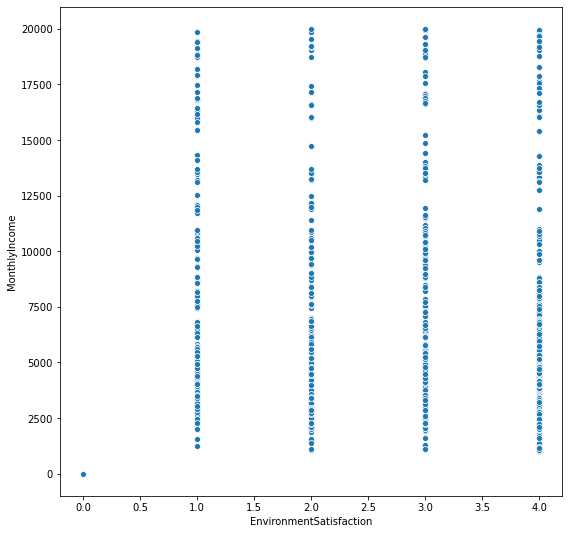

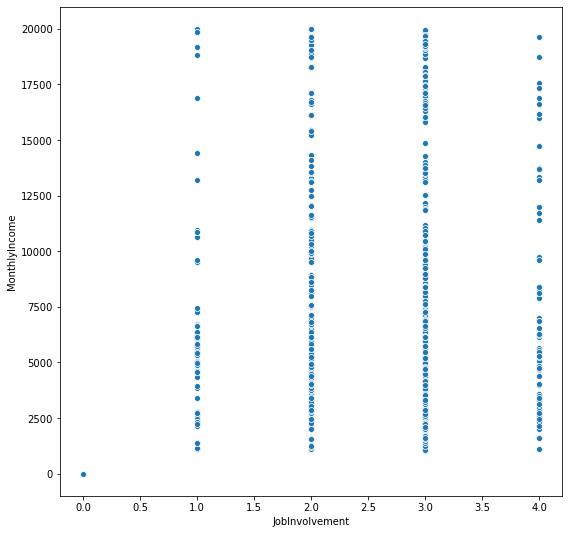

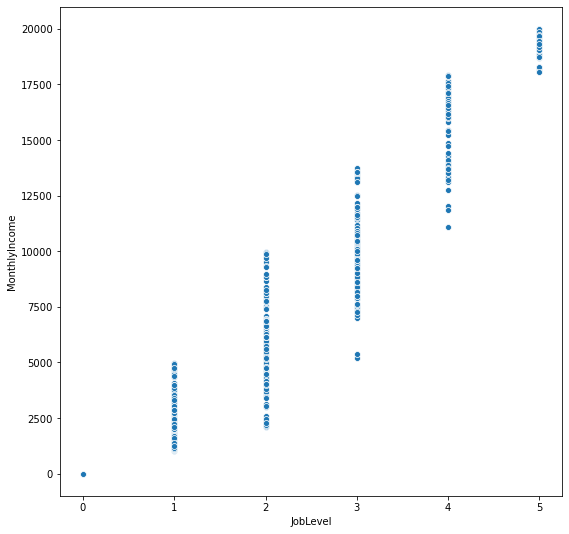

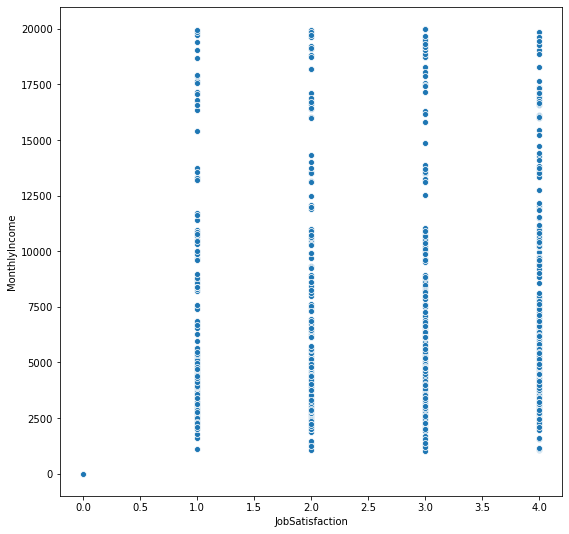

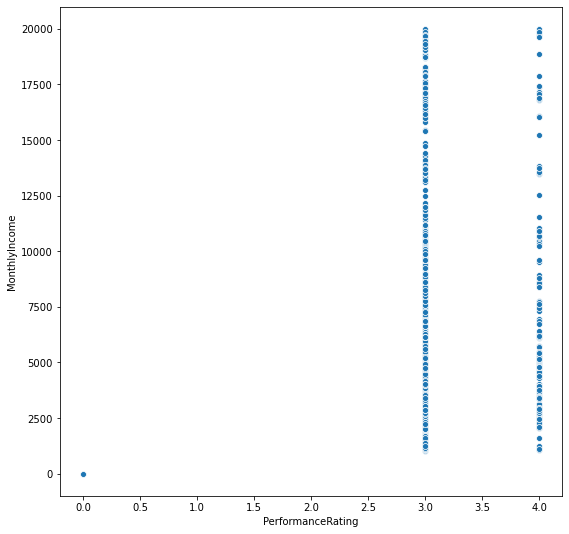

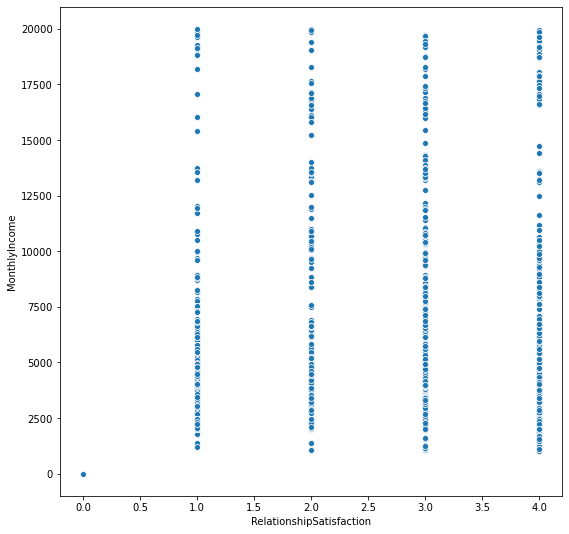

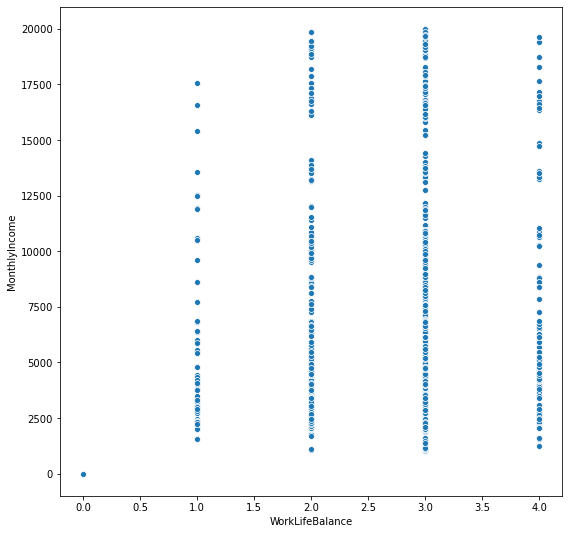

In [58]:
for i in var_para_scatter:
    plt.figure(figsize=(9,9))
    sns.scatterplot(x = i, y = df["MonthlyIncome"], data = df)

##### Es raro que tenga una performance tan baja la gran mayoria de los empleados, pero un nivel de participacion medio, puede ser que los objetivos sean muy altos, por otro lado, el breve tiempo que las personas tienen al manager podria indicar que existe una alta rotación de managers. Habría que seguir profundizando sobre este tema.

## Filtramos el dataset.
Con el objetivo de poder identificar un denominador común, filtramos el dataset en torno a aquellas personas que si se van de la organización para ver que características comparten.

In [59]:
mask_si_se_van= df.Attrition == 1

In [60]:
df_si_se_van = df.loc[mask_si_se_van]

In [61]:
fp.freq_tbl(df_si_se_van)

   Generaciones  frequency  percentage  cumulative_perc
0    Milennials         91    0.517045         0.517045
1  Generación X         43    0.244318         0.761364
2  Generación Z         37    0.210227         0.971591
3  Baby Boomers          5    0.028409         1.000000

----------------------------------------------------------------

  Rendimiento  frequency  percentage  cumulative_perc
0        Bajo        148    0.840909         0.840909
1       Medio         21    0.119318         0.960227
2        Alto          7    0.039773         1.000000

----------------------------------------------------------------

  Nivel de Incremento  frequency  percentage  cumulative_perc
0               Medio         90    0.511364         0.511364
1                Bajo         52    0.295455         0.806818
2                Alto         34    0.193182         1.000000

----------------------------------------------------------------

  Rango Salario  frequency  percentage  cumulative_perc